In [1]:
import numpy as np
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import re
from numpy import array
from sklearn.manifold import TSNE
with open("C://Dr. Bhandarkar- Directed Study//nounVectorsFastext.txt",'r') as myfile:
    tempdata=myfile.read()
opbrack=[]
closebrack=[]
for i in range(0,tempdata.__len__()):
    if tempdata[i]=='[':
        opbrack.append(i)
    if tempdata[i]==']':
        closebrack.append(i)
names=[]
str=tempdata.split(']')
for i in range(0,len(str)-1):
    a = re.findall(r'\w+', str[i])
    names.append(a[0])
count=0
data=[]
while count<opbrack.__len__():
    data.append(tempdata[opbrack[count]+1:closebrack[count]])
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==" ":
            temp=temp.replace(temp[counter],"")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
while count<data.__len__():
    counter=0
    temp=data[count]
    while counter<data[count].__len__():
        if temp[counter]==",":
            temp=temp.replace(temp[counter]," ")
        data[count]=temp
        counter=counter+1
    count=count+1
count=0
X=[]
while count<data.__len__():
    temp=data[count]
    floats = [float(x) for x in temp.split()]
    X.append(floats)
    count=count+1
x=X[0]
X=np.array(X)


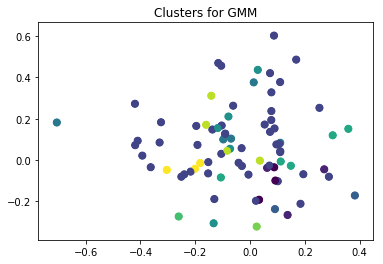

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='random', random_state=0)
proj=tsne.fit_transform(X)
clustering = SpectralClustering(n_clusters=11,assign_labels="kmeans")
clustering.fit(X)
clusteringoutput=clustering.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusteringoutput, s=50, cmap='viridis')

plt.title('Clusters for GMM')
plt.scatter(X[:, 0], X[:, 1], c=clusteringoutput, s=40, cmap='viridis');
plt.savefig('GMM clusters')

In [3]:
labels=clustering.labels_
clust=[]
clusternames=[]
listofl=[]
for i in range(0,17):
    arr=list(np.where(labels==i))
    clust.append(arr)
for i in range(0,len(clust)):
    temp=clust[i]
    for k in range(0,len(clust[i])):
        clusternames=[]
        for l in range(0,len(clust[i][k])):
            clusternames.append(names[clust[i][k][l]])
        listofl.append(clusternames)

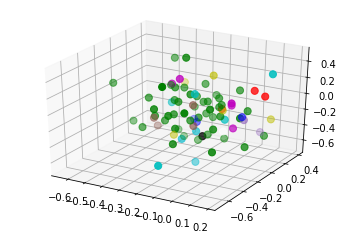

In [4]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
# labels = kmeans.labels_ 
Label_Map = {0:'r',1:'b',2:'g',3:'tab:purple',4:'c',5:'m',6:'y',7:'k',8:'w',9:'tab:brown',10:'tab:cyan'}
label_color = [Label_Map[l] for l in labels]
ax=plt.axes(projection ='3d')
ax.scatter(X[:,3],X[:,0],X[:,2] , c=label_color, s=50)

plt.show()